In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import seaborn as sns

%matplotlib inline

In [2]:
classes = ["Benign", "Likely Benign", "Uncertain Significance", "Likely Pathogenic", "Pathogenic"]
short_classes = ["B", "LB", "US", "LP", "P"]

confusion_values_1 = np.array([
    [60917, 6974, 8950, 305, 11],
    [627, 3363, 1104, 44, 3],
    [879, 1584, 3984, 107, 11],
    [0, 2, 1, 14, 1],
    [0, 0, 1, 2, 6]
])

confusion_values_2 = np.array([
    [70854, 2831, 3471, 0, 0],
    [271, 4218, 651, 1, 0],
    [583, 1177, 4800, 5, 0],
    [0, 0, 4, 12, 2],
    [0, 0, 3, 1, 5]
])

In [3]:
def draw_confusion_matrix_normalized(matrix, labels, full_labels):
    normalized_confusion_matrix = (matrix / matrix.sum(axis=1, keepdims=True))

    # Create a heatmap using seaborn with a logarithmic color scale
    plt.figure(figsize=(15, 8))
    sns.set(font_scale=1.8)

    # sns.heatmap(np.log1p(normalized_confusion_matrix), annot=True, fmt=".2f", cmap="Blues", cbar=False)
    heatmap = sns.heatmap(normalized_confusion_matrix, annot=True, fmt=".1%", cmap="Blues", cbar=False,
                xticklabels=labels,
                yticklabels=labels)

    # Add labels and title
    plt.xlabel("Predicted Label", labelpad=40)
    plt.ylabel("True Label", labelpad=40)
    plt.title("Confusion Matrix (Normalized)", pad=40, fontdict={'fontsize': 30})

    plt.yticks(rotation=0)    

    legend_handles = [plt.Line2D([0], [0], color='b', label=f"{labels[i]}: {full_labels[i]}") for i in range(len(labels))]
    plt.legend(handles=legend_handles, title="Legend", bbox_to_anchor=(1, 1), loc="upper left")

    plt.tight_layout()  # Adjust layout to prevent overlap

    plt.show()

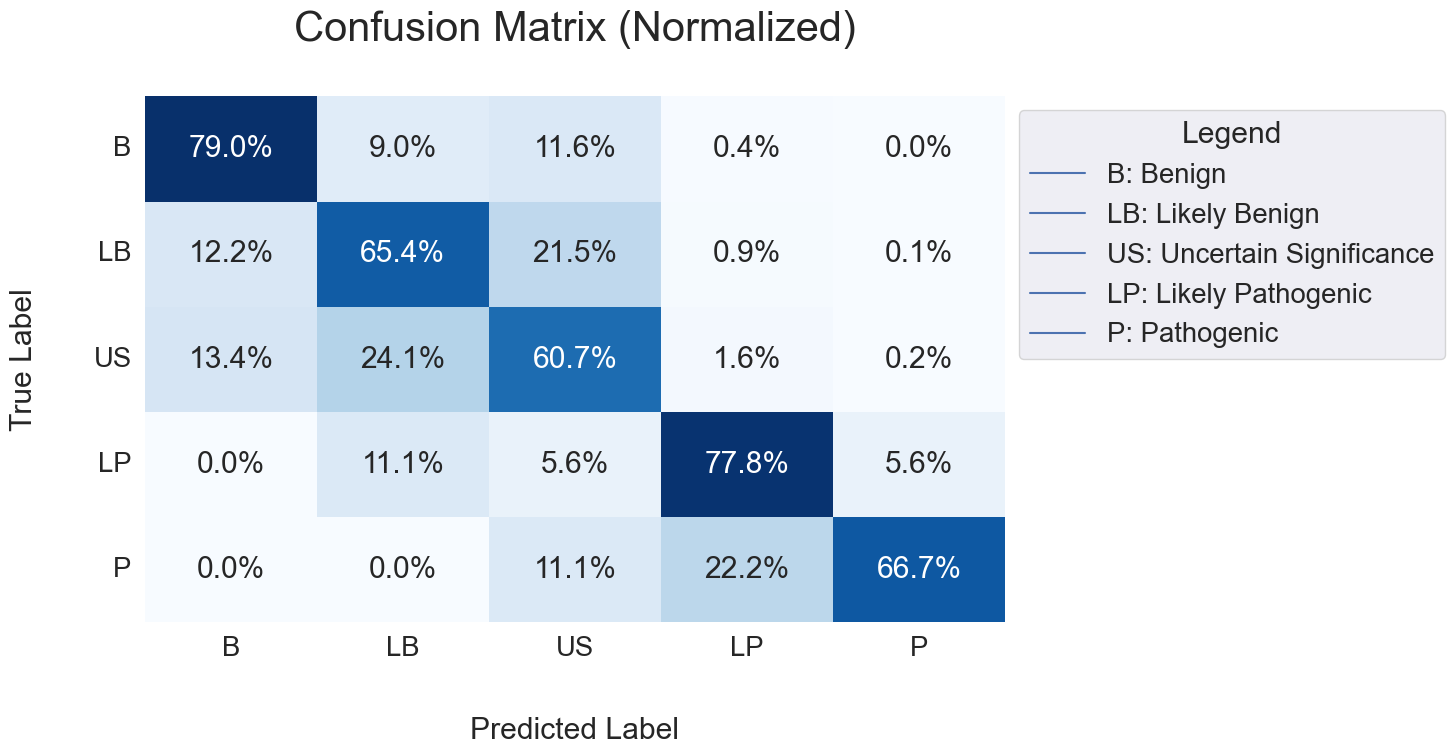

In [4]:
draw_confusion_matrix_normalized(confusion_values_1, short_classes, classes)

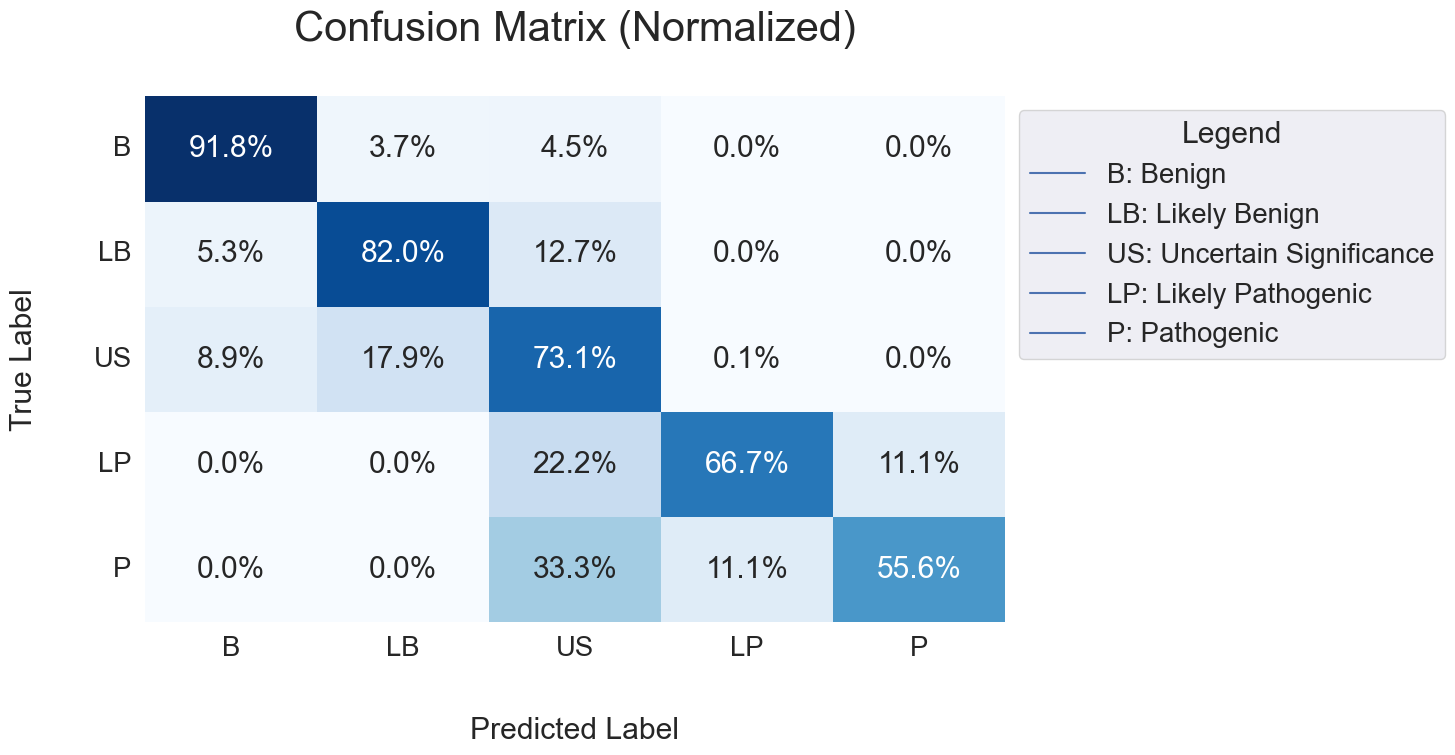

In [5]:
draw_confusion_matrix_normalized(confusion_values_2, short_classes, classes)